In [79]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('train.csv')

In [81]:
df.drop(columns = ["User_ID","Product_ID"],inplace=True)

In [82]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [83]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [85]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [86]:
pd.pivot_table(df, values='Purchase', index='Gender', aggfunc=np.sum)

,Purchase
Gender,
F,1186232642
M,3909580100


In [87]:
pd.pivot_table(df, values='Purchase', index='Gender', aggfunc=np.mean)

,Purchase
Gender,
F,8734.565765
M,9437.526040


In [89]:
pd.pivot_table(df, values='Purchase', index='Age', aggfunc=np.sum)

,Purchase
Age,
0-17,134913183
18-25,913848675
26-35,2031770578
36-45,1026569884
46-50,420843403
51-55,367099644
55+,200767375


In [90]:
df.isna().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [92]:
df = df.fillna(0)

In [93]:
df.isna().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

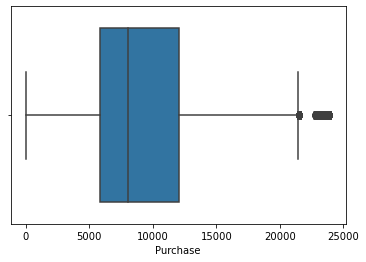

In [94]:
sns.boxplot(df['Purchase'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

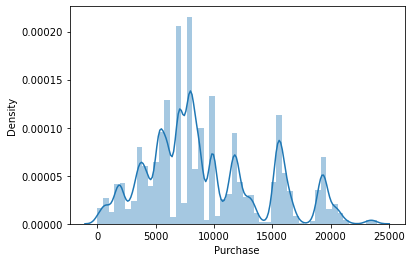

In [95]:
sns.distplot(df['Purchase'])

By looking at these two plots --->>> there are outliers


In [96]:
df.duplicated().value_counts()

False    544807
True       5261
dtype: int64

### Outier analysis

In [99]:
q1 = df['Purchase'].quantile(0.25)

q3 = df['Purchase'].quantile(0.75)

iqr = q3 - q1

ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr   

In [100]:
df[(df['Purchase']<ll) | (df['Purchase']>ul)].shape

(2677, 10)

In [101]:
#There are 0.48% of outliers in overall data

2677/550068 * 100

0.4866671029763593

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

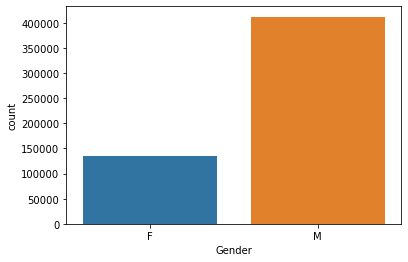

In [104]:
sns.countplot(df['Gender'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

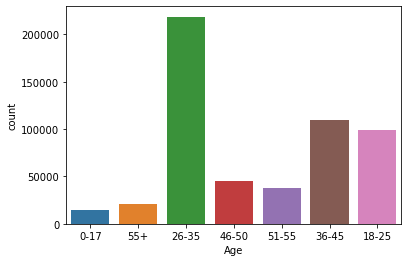

In [105]:
sns.countplot(df['Age'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

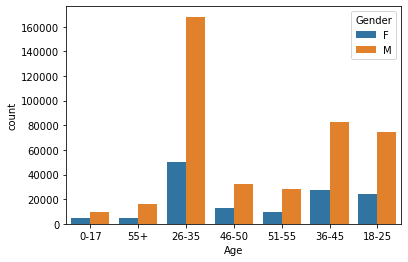

In [106]:
sns.countplot(df['Age'], hue=df['Gender'])

In [107]:
df['combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)

In [108]:
df['combined_G_M'].head()

0    F_0
1    F_0
2    F_0
3    F_0
4    M_0
Name: combined_G_M, dtype: object

In [109]:
df['combined_G_M'].unique()

array(['F_0', 'M_0', 'M_1', 'F_1'], dtype=object)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='combined_G_M', ylabel='count'>

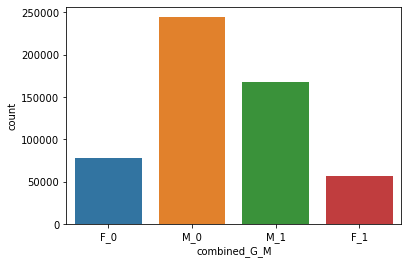

In [110]:
sns.countplot(df['combined_G_M'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

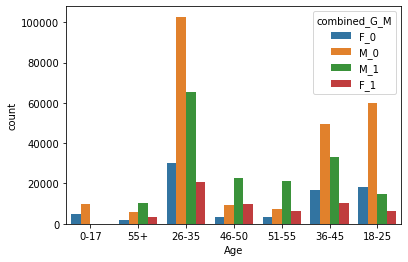

In [111]:
sns.countplot(df['Age'],hue=df['combined_G_M'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

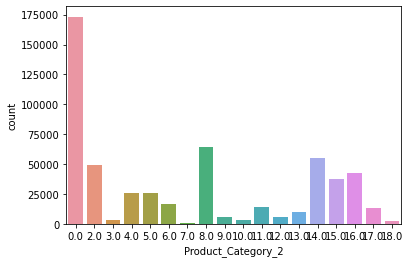

In [113]:
sns.countplot(df['Product_Category_2'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

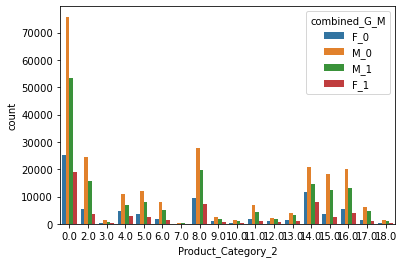

In [114]:
sns.countplot(df['Product_Category_2'],hue=df['combined_G_M'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

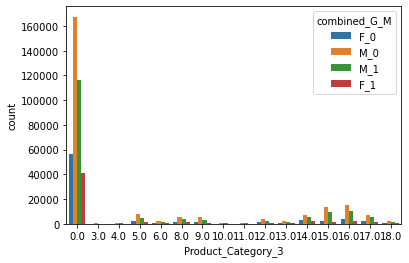

In [115]:
sns.countplot(df['Product_Category_3'],hue=df['combined_G_M'])

In [116]:
df_by_occupation_and_categories = df.groupby(['Occupation','Product_Category_1']).count().reset_index('Product_Category_1')

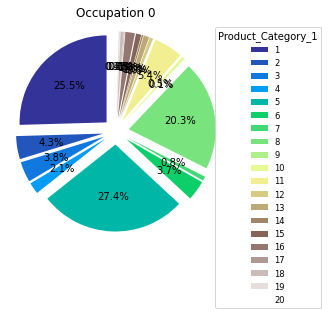

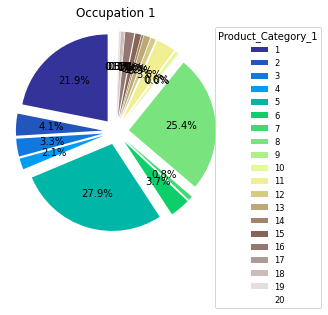

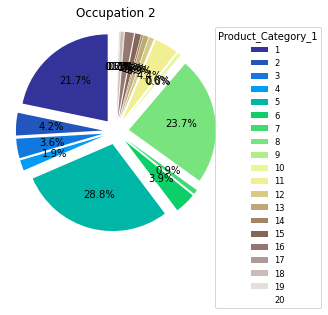

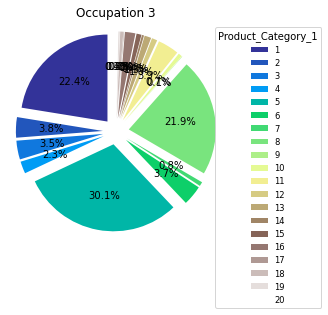

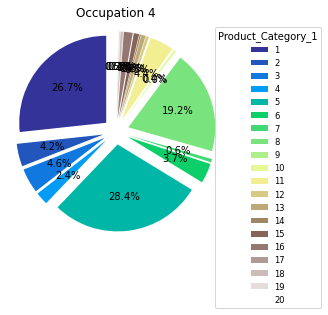

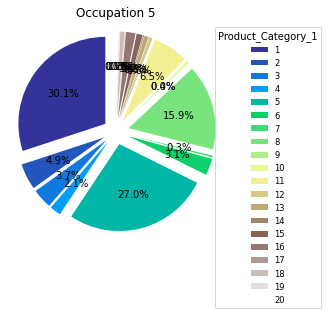

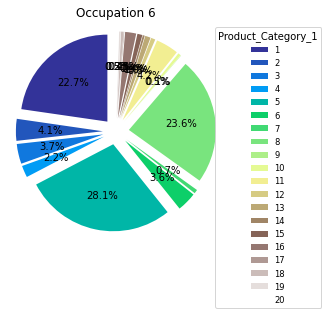

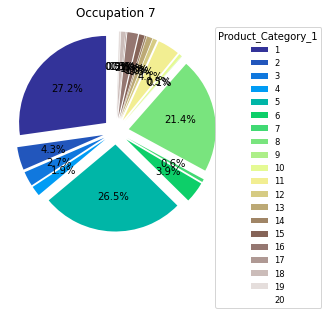

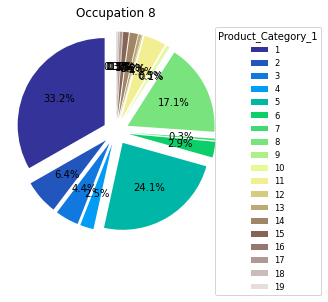

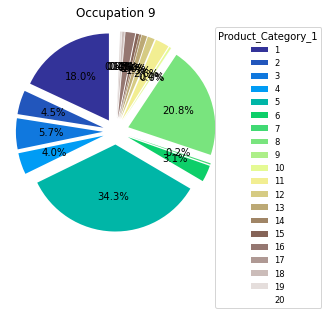

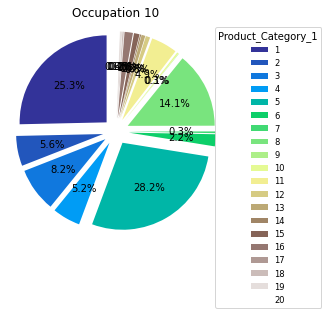

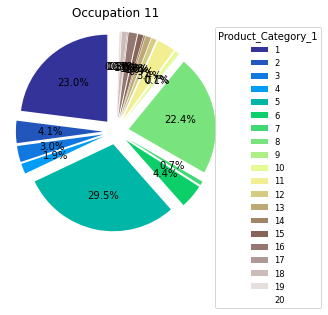

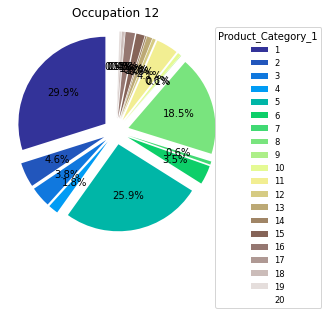

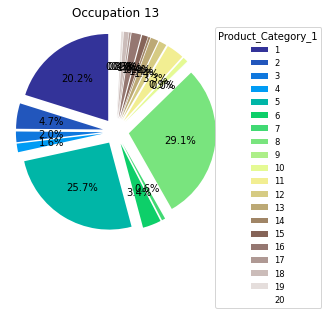

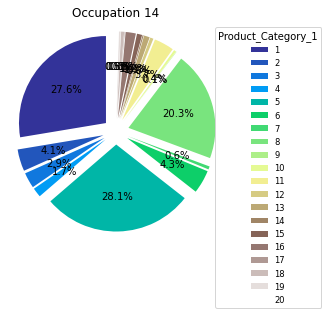

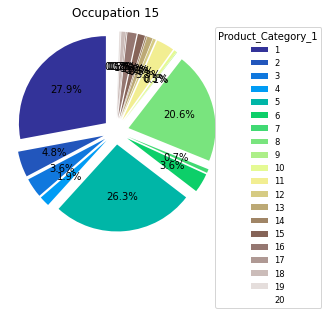

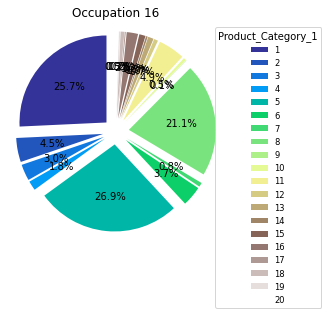

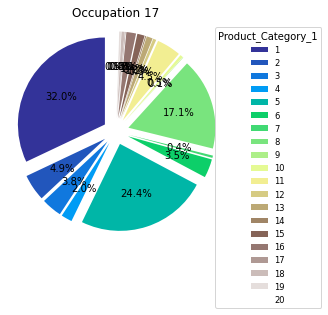

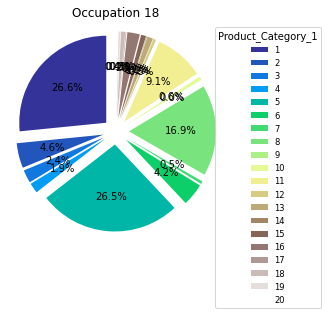

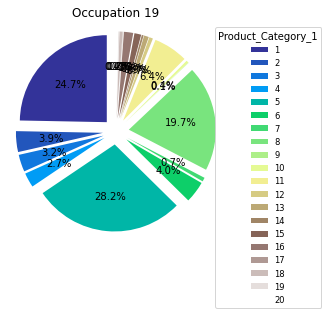

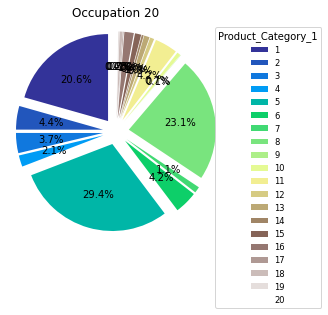

In [117]:
fig = plt.figure()
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')
cmap = plt.get_cmap('terrain')
colors = [cmap(i) for i in np.linspace(0, 1, 20)]
plotFor = "Occupation {0}"
title = 'Product_Category_1'
for i in range(21):
    explode = [0.15 for i in range(len(df_by_occupation_and_categories['Gender'][i]))]
    a = plt.pie(df_by_occupation_and_categories['Gender'][i], radius=1, colors=colors,startangle=90,autopct='%1.1f%%',explode=explode)
    plt.legend(df_by_occupation_and_categories['Product_Category_1'][0],loc='upper center',prop=fontP, bbox_to_anchor=(1.2, 1),title=title)
    
    plt.title(plotFor.format(i))
    plt.show()

- as seen, The proportion of products purchased is general -->> category 1, 5 are most bought by customers of any occupation and 13-18 categories are bought in less numbers compared to other products.

- Also, noticed that in category 1 - >> its  most bought by clients who have 8, 17, 5 occupations. That can be used if we need to recommende a product on a platform where occupation of user is known.
